In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# import Dataset (df)
df = pd.read_csv('/content/FInal_Train_Data.csv')

In [ ]:
df.head()

,Unnamed: 0,pain chest,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat sweating increased,palpitation,...,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts,prognosis
0,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,hypertensive disease
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,diabetes
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"depression mental , depressive disorder"
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"coronary arteriosclerosis ,coronary heart disease"
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pneumonia


In [ ]:
df.shape

(2564, 402)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Columns: 402 entries, Unnamed: 0 to prognosis
dtypes: int64(401), object(1)
memory usage: 7.9+ MB


In [ ]:
df.columns

Index(['Unnamed: 0', 'pain chest', 'shortness of breath', 'dizziness',
       'asthenia', 'fall', 'syncope', 'vertigo', 'sweat sweating increased',
       'palpitation',
       ...
       'prodrome', 'hypoproteinemia', 'alcohol binge episode', 'abdomen acute',
       'air fluid level', 'catching breath', 'large-for-dates fetus',
       'immobile', 'homicidal thoughts', 'prognosis'],
      dtype='object', length=402)

In [ ]:
# drop column 'unnamed' containing only 0 values
df = df.drop(columns=['Unnamed: 0'])
df.shape

(2564, 401)

In [ ]:
df.describe()

,pain chest,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat sweating increased,palpitation,nausea,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
count,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,...,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000
mean,0.064353,0.124415,0.022621,0.074103,0.026911,0.050312,0.015991,0.040952,0.035101,0.060062,...,0.003510,0.002730,0.001950,0.003120,0.002730,0.001560,0.001950,0.001560,0.001170,0.002340
std,0.245428,0.330119,0.148721,0.261989,0.161855,0.218631,0.125463,0.198217,0.184072,0.237649,...,0.059154,0.052189,0.044125,0.055782,0.052189,0.039475,0.044125,0.039475,0.034193,0.048327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
missing_values = df.isnull().sum()

# Create a DataFrame to show missing values
missing_df = pd.DataFrame(missing_values, columns=['Missing Values'])

# Display the DataFrame
print(missing_df)

                       Missing Values
pain chest                          0
shortness of breath                 0
dizziness                           0
asthenia                            0
fall                                0
...                               ...
catching breath                     0
large-for-dates fetus               0
immobile                            0
homicidal thoughts                  0
prognosis                           0

[401 rows x 1 columns]


In [ ]:
# Filter out columns with no missing values
missing_columns = missing_values[missing_values > 0]

print(missing_columns)

Series([], dtype: int64)


# EDA

In [ ]:
#Analyze the Target Variable ('prognosis' is the target variable)
print("Distribution of the target variable 'prognosis':")
print(df['prognosis'].value_counts())

Distribution of the target variable 'prognosis':
prognosis
upper respiratory infection    43
bipolar disorder               43
anxiety state                  37
psychotic disorder             37
chronic kidney failure         34
                               ..
affect labile                   9
kidney disease                  7
migraine disorders              7
pancytopenia                    7
decubitus ulcer                 3
Name: count, Length: 133, dtype: int64


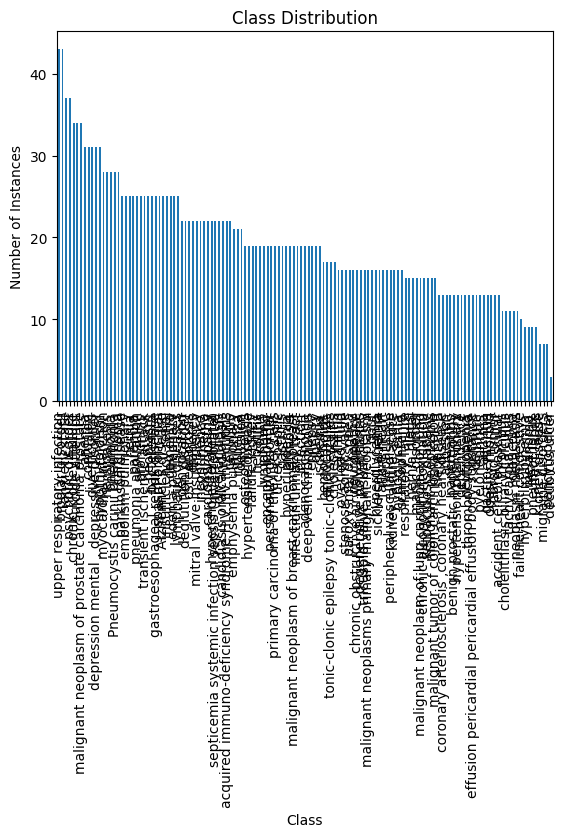

In [ ]:
#Visualize the Distribution of the Target Variable(prognosis)

class_distribution = df['prognosis'].value_counts()
class_distribution.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.show()

In [ ]:
# dropping class 'decubitus ulcer' due to its less no. of rows
df = df[df['prognosis'] != 'decubitus ulcer']

In [ ]:
df[df['prognosis'] == 'decubitus ulcer']

,pain chest,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat sweating increased,palpitation,nausea,...,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts,prognosis


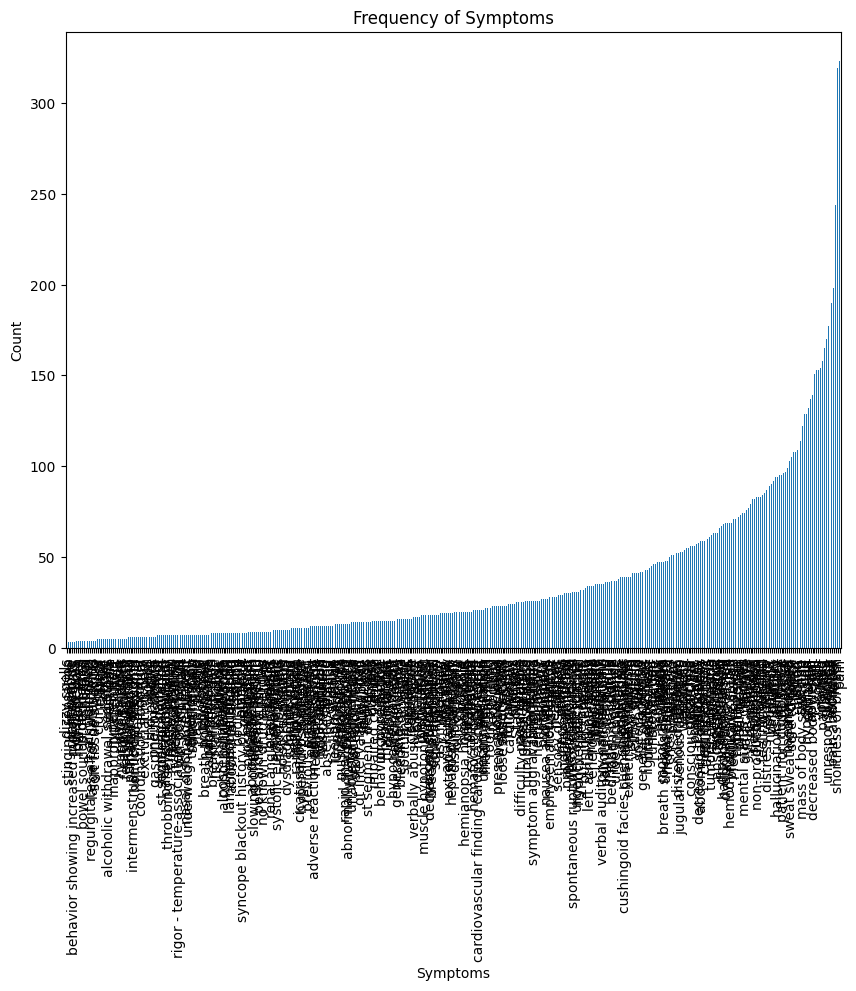

In [ ]:
# Get the number of times each symptom appears
symptom_sums = df.drop(columns=['prognosis']).sum()

# Plot the symptoms frequency
plt.figure(figsize=(10, 8))
symptom_sums.sort_values().plot(kind='bar')
plt.title('Frequency of Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.show()

In [ ]:
# Sort symptoms by frequency (ascending order)
sorted_symptoms = symptom_sums.sort_values()

# Display the sorted symptoms with their counts
print(sorted_symptoms)

dizzy spells                                   1
stinging sensation                             3
immobile                                       3
charleyhorse                                   3
behavior showing increased motor activity      3
                                            ... 
asthenia                                     190
pain abdominal                               198
fever                                        244
shortness of breath                          319
pain                                         323
Length: 400, dtype: int64


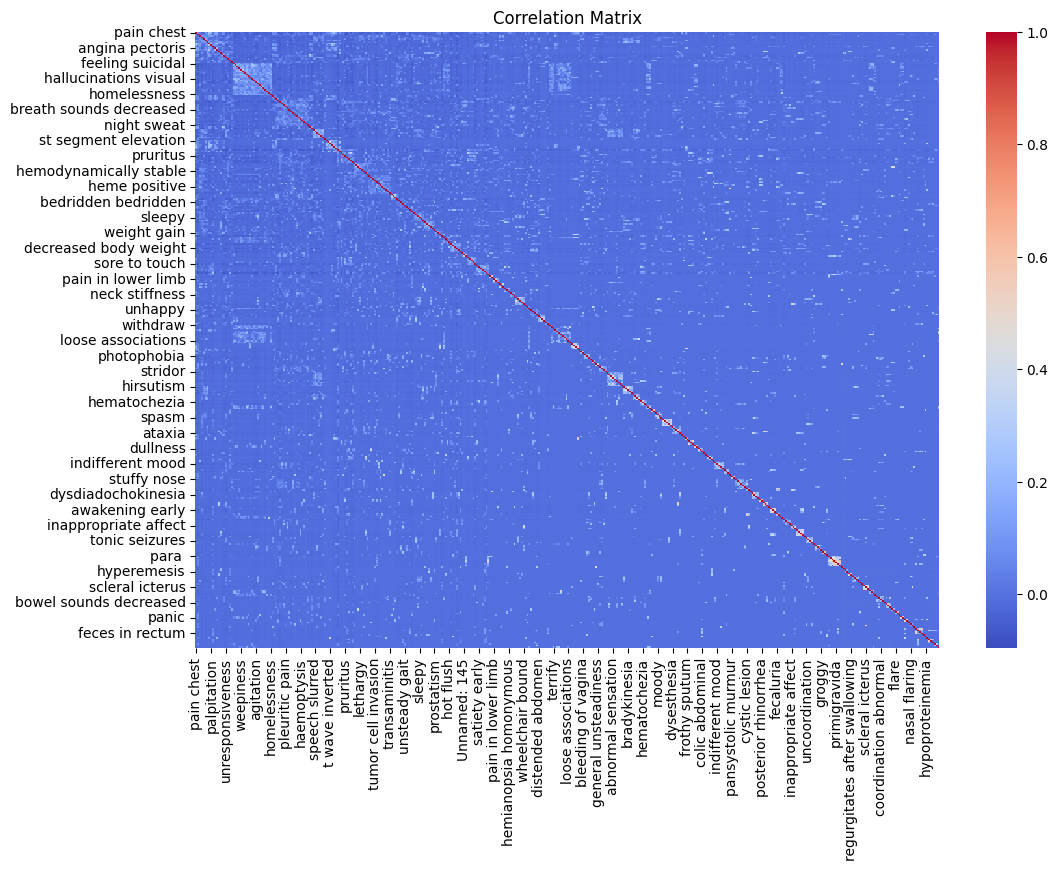

In [ ]:
# Drop the target variable if it's non-numeric
numeric_df = df.drop(columns=['prognosis'])

numeric_df = numeric_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

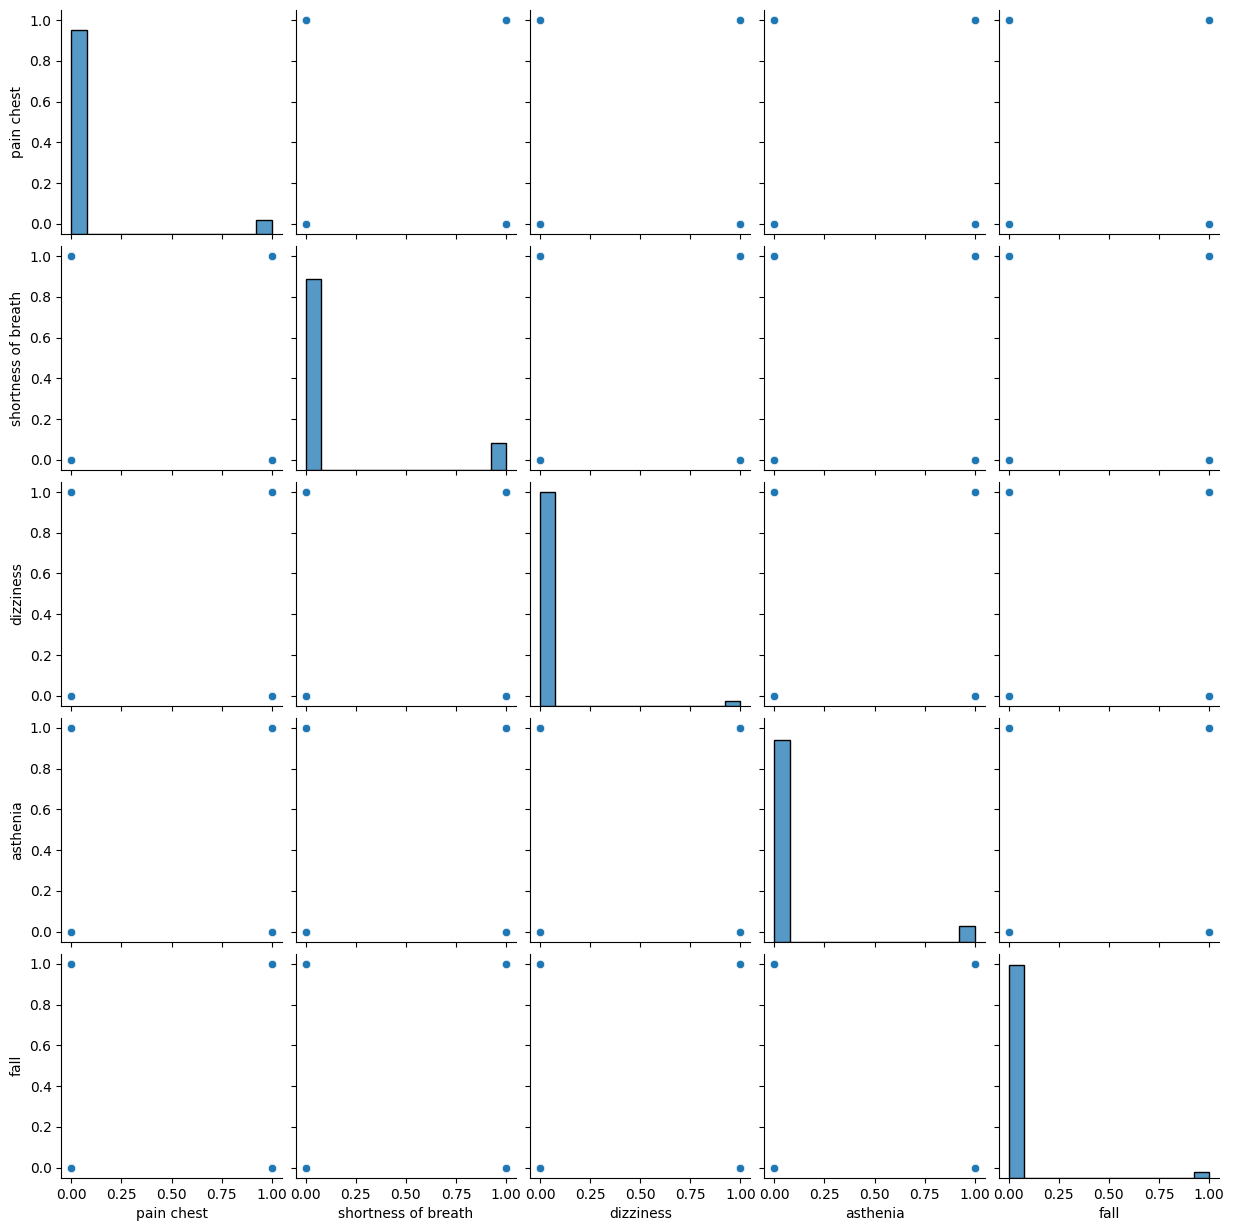

In [ ]:
#Pairplot for a few Features
#Selecting the first 5 columns for pairplot
selected_columns = df.columns[:5]  # Adjust the number of columns as needed
sns.pairplot(df[selected_columns])
plt.show()

In [ ]:
corr_matrix

,pain chest,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat sweating increased,palpitation,nausea,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
pain chest,1.000000,0.103297,0.024193,-0.031807,-0.024021,0.085000,0.029885,0.242508,0.183119,0.013902,...,-0.015584,-0.013738,-0.011607,-0.014690,-0.013738,-0.010379,-0.011607,-0.010379,-0.008987,-0.012717
shortness of breath,0.103297,1.000000,-0.001784,0.024064,-0.004343,0.069916,0.027256,0.178429,0.069285,-0.030750,...,-0.022401,-0.019748,-0.016683,0.042454,-0.019748,-0.014919,-0.016683,0.074911,0.021651,-0.018279
dizziness,0.024193,-0.001784,1.000000,0.097109,0.071926,0.072943,0.043316,0.114121,0.127732,0.105015,...,-0.009040,-0.007969,-0.006733,-0.008521,-0.007969,-0.006021,-0.006733,-0.006021,-0.005213,-0.007377
asthenia,-0.031807,0.024064,0.097109,1.000000,0.035711,0.139171,0.082599,0.016606,-0.005478,-0.015199,...,-0.016811,-0.014820,-0.012520,-0.015846,-0.014820,-0.011196,-0.012520,-0.011196,-0.009694,-0.013718
fall,-0.024021,-0.004343,0.071926,0.035711,1.000000,0.138099,0.094060,0.002080,-0.018660,0.008631,...,-0.009882,-0.008711,-0.007360,-0.009315,-0.008711,-0.006581,-0.007360,-0.006581,-0.005699,-0.008064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
air fluid level,-0.010379,-0.014919,-0.006021,-0.011196,-0.006581,-0.009109,-0.005045,-0.008178,-0.007548,0.073181,...,-0.002349,-0.002071,-0.001749,-0.002214,0.566096,1.000000,-0.001749,-0.001564,-0.001354,-0.001917
catching breath,-0.011607,-0.016683,-0.006733,-0.012520,-0.007360,-0.010186,-0.005642,-0.009145,-0.008441,0.026021,...,-0.002627,-0.002315,-0.001956,-0.002476,0.167112,-0.001749,1.000000,-0.001749,-0.001515,-0.002143
large-for-dates fetus,-0.010379,0.074911,-0.006021,-0.011196,-0.006581,-0.009109,-0.005045,-0.008178,-0.007548,-0.010004,...,-0.002349,-0.002071,-0.001749,-0.002214,-0.002071,-0.001564,-0.001749,1.000000,0.287716,-0.001917
immobile,-0.008987,0.021651,-0.005213,-0.009694,-0.005699,-0.007887,-0.004368,-0.007081,-0.006536,-0.008662,...,-0.002034,-0.001793,-0.001515,-0.001917,-0.001793,-0.001354,-0.001515,0.287716,1.000000,-0.001660


In [ ]:
# Chi-Square test
from sklearn.feature_selection import chi2

X = df.drop(columns=['prognosis'])
y = df['prognosis']

chi_scores = chi2(X, y)
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2': chi_scores[0]})
chi2_df = chi2_df.sort_values(by='Chi2', ascending=False)

print(chi2_df)

                                       Feature         Chi2
343                      previous pregnancies   2156.000000
138       cushingoid facies cushingoid habitus  1988.831439
303                                monocytosis  1960.000000
263                                   sciatica  1908.750000
347                                  pain neck  1854.545455
..                                         ...          ...
366  behavior showing increased motor activity   362.857143
317                                dyspareunia   361.857143
373                               charleyhorse   304.320000
228                         stinging sensation   271.392857
348                               dizzy spells   169.733333

[400 rows x 2 columns]


In [ ]:
# Split features and target
X = df.drop(columns=['prognosis'])   # target
y = df['prognosis']                  # features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter

# Get the minimum class count
min_class_count = min(Counter(y_train).values())


# Ensure k_neighbors is at least 1
k_neighbors = max(1, min(5, min_class_count - 1))


# Set k_neighbors to be at most min_class_count - 1, but at least 1
k_neighbors = min(5, min_class_count - 1)
k_neighbors = max(1, k_neighbors)

# Apply SMOTE with the adjusted k_neighbors
smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Check the distribution of target classes after SMOTE
print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_train_smote)}")

Before SMOTE: Counter({'bipolar disorder': 32, 'upper respiratory infection': 29, 'psychotic disorder': 28, 'chronic kidney failure': 27, 'anxiety state': 27, 'suicide attempt': 25, 'malignant neoplasm of prostate carcinoma prostate': 25, 'depression mental , depressive disorder': 24, 'hypothyroidism': 23, 'confusion': 22, 'diverticulitis': 22, 'pneumonia': 21, 'Pneumocystis\xa0carinii\xa0pneumonia': 21, 'carcinoma': 20, 'anemia': 20, 'lymphatic diseases': 19, 'diverticulosis': 19, 'myocardial infarction': 19, 'hemiparesis': 19, 'ulcer peptic': 18, 'incontinence': 18, 'diabetes': 18, 'embolism pulmonary': 18, 'dementia': 17, 'mitral valve insufficiency': 17, 'dehydration': 17, 'hypercholesterolemia': 17, 'edema pulmonary': 17, 'paranoia': 17, 'pneumonia aspiration': 17, 'spasm bronchial': 17, 'acquired\xa0immuno-deficiency syndrome HIV hiv infections': 16, 'neoplasm': 16, 'primary carcinoma of the liver cells': 16, 'adenocarcinoma': 16, "Alzheimer's disease": 16, 'cardiomyopathy': 16, 

Accuracy: 0.9931344696969697
Classification Report:
                                                           precision    recall  f1-score   support

                                     Alzheimer's disease       1.00      1.00      1.00        32
                          Pneumocystis carinii pneumonia       1.00      1.00      1.00        32
                                accident cerebrovascular       1.00      1.00      1.00        32
  acquired immuno-deficiency syndrome HIV hiv infections       1.00      1.00      1.00        32
                                          adenocarcinoma       1.00      1.00      1.00        32
                                                adhesion       1.00      1.00      1.00        32
                                           affect labile       1.00      1.00      1.00        32
                                                  anemia       1.00      1.00      1.00        32
                                           anxiety state       1

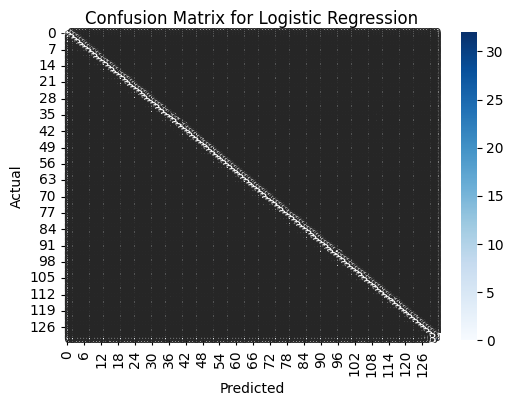

Cross-Validation Scores with StratifiedKFold: [0.95321637 0.97070312 0.95507812 0.95507812 0.97070312]
Mean Cross-Validation Score: 0.9609557748538012


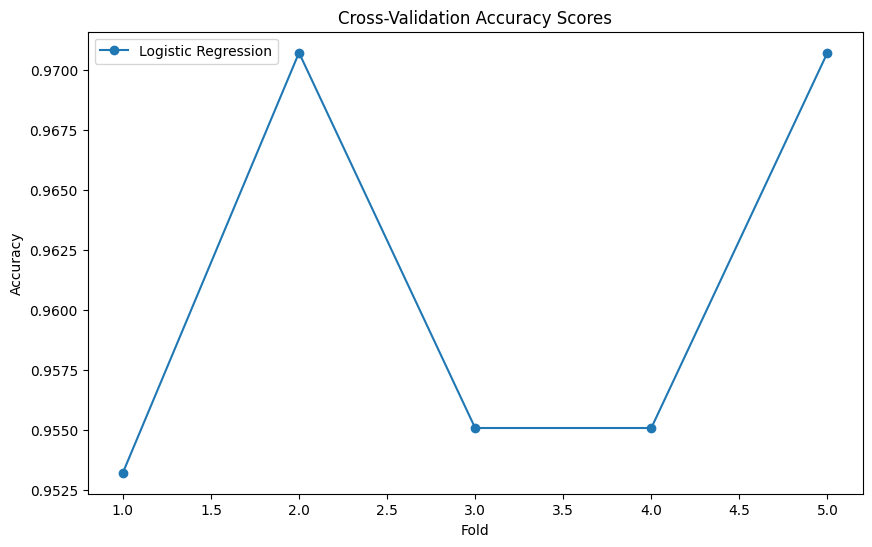

In [ ]:
# Initialize Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed

clf.fit(X_train_smote, y_train_smote)

y_train_pred = clf.predict(X_train_smote)

print("Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Classification Report:\n", classification_report(y_train_smote, y_train_pred))
print("Precision:", precision_score(y_train_smote, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train_smote, y_train_pred, average='weighted'))
print("F1 Score:", f1_score(y_train_smote, y_train_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_train_smote, y_train_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_train_smote, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')

# Output cross-validation scores
print("Cross-Validation Scores with StratifiedKFold:", scores)
print("Mean Cross-Validation Score:", scores.mean())

# Plotting Cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores, label='Logistic Regression', marker='o')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy: 0.9997632575757576
Classification Report:
                                                           precision    recall  f1-score   support

                                     Alzheimer's disease       1.00      1.00      1.00        32
                          Pneumocystis carinii pneumonia       1.00      1.00      1.00        32
                                accident cerebrovascular       1.00      1.00      1.00        32
  acquired immuno-deficiency syndrome HIV hiv infections       1.00      1.00      1.00        32
                                          adenocarcinoma       1.00      1.00      1.00        32
                                                adhesion       1.00      1.00      1.00        32
                                           affect labile       1.00      1.00      1.00        32
                                                  anemia       1.00      1.00      1.00        32
                                           anxiety state       1

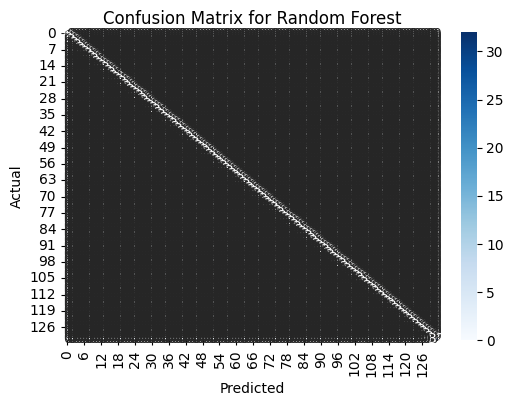

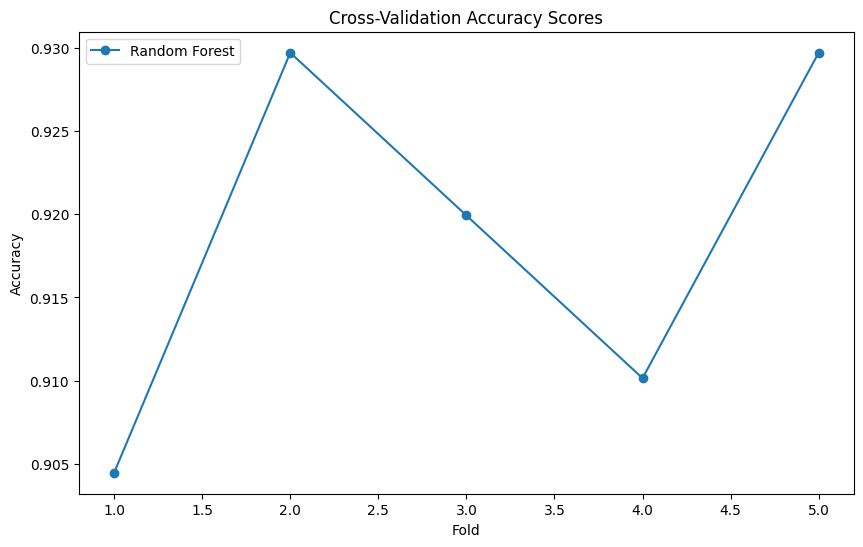

Cross-Validation Scores with StratifiedKFold: [0.90448343 0.9296875  0.91992188 0.91015625 0.9296875 ]
Mean Cross-Validation Score: 0.918787311159844


In [ ]:
# Initialize Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the SMOTE-balanced training data
clf.fit(X_train_smote, y_train_smote)

# Predict on the SMOTE-balanced training data
y_train_pred = clf.predict(X_train_smote)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Classification Report:\n", classification_report(y_train_smote, y_train_pred))
print("Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Precision:", precision_score(y_train_smote, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train_smote, y_train_pred, average='weighted'))
print("F1 Score:", f1_score(y_train_smote, y_train_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_train_smote, y_train_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_train_smote, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

# Plotting Cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores, label='Random Forest', marker='o')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Output cross-validation scores
print("Cross-Validation Scores with StratifiedKFold:", scores)
print("Mean Cross-Validation Score:", scores.mean())